# Titanic ML Competition

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Exploring Data


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check if there's duplicate enteries

In [3]:
sum(train_data.duplicated())

0

In [4]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Clean Data

In [5]:
train_data.drop(['SibSp','Parch','Fare','Cabin','Ticket', 'Name'], axis = 1, inplace = True)
train_data.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass     Sex   Age Embarked
0              1         0       3    male  22.0        S
1              2         1       1  female  38.0        C
2              3         1       3  female  26.0        S
3              4         1       1  female  35.0        S
4              5         0       3    male  35.0        S
..           ...       ...     ...     ...   ...      ...
886          887         0       2    male  27.0        S
887          888         1       1  female  19.0        S
888          889         0       3  female   NaN        S
889          890         1       1    male  26.0        C
890          891         0       3    male  32.0        Q

[891 rows x 6 columns]>

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age
count,891.000000,891.000000,891.000000,714.000000
mean,446.000000,0.383838,2.308642,29.699118
std,257.353842,0.486592,0.836071,14.526497
min,1.000000,0.000000,1.000000,0.420000
25%,223.500000,0.000000,2.000000,20.125000
50%,446.000000,0.000000,3.000000,28.000000
75%,668.500000,1.000000,3.000000,38.000000
max,891.000000,1.000000,3.000000,80.000000


## Explore patterns

### Survival based on gender

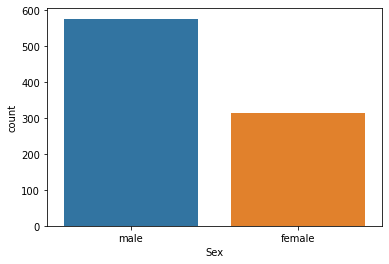

In [7]:
sns.countplot(x='Sex', data=train_data);

The number of males aboard is almost double the number of females.

In [8]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = round(sum(women)/len(women)*100 , 2)

print("{}% of women survived".format(rate_women))

74.2% of women survived


In [9]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = round(sum(men)/len(men)*100, 2)

print("{}% of men survived".format(rate_men))

18.89% of men survived


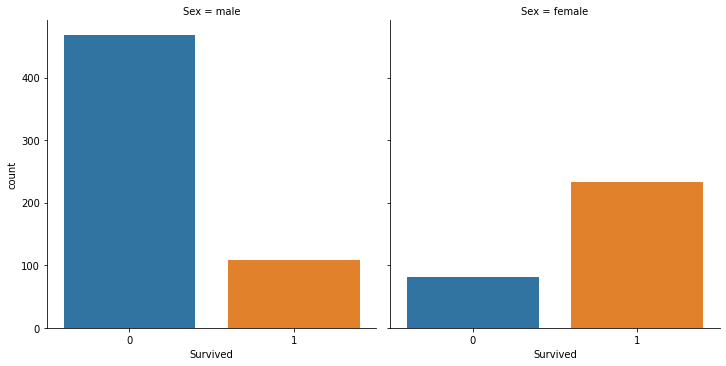

In [10]:
sns.catplot(x='Survived', col='Sex', kind='count', data=train_data);

#### Conclusion
Women have higher chances of survival

### Survival based on ticket class

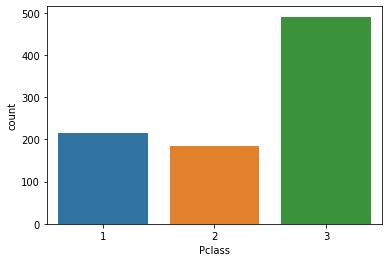

In [11]:
sns.countplot(x='Pclass', data=train_data);

In [12]:
first_class = train_data.loc[train_data.Pclass == 1]["Survived"]
rate_first = round(sum(first_class)/len(first_class)*100 , 2)

print("{}% of the first class passengers survived".format(rate_first))

62.96% of the first class passengers survived


In [13]:
sec_class = train_data.loc[train_data.Pclass == 2]["Survived"]
rate_sec = round(sum(sec_class)/len(sec_class)*100 , 2)

print("{}% of the second class passengers survived".format(rate_sec))

47.28% of the second class passengers survived


In [14]:
third_class = train_data.loc[train_data.Pclass == 3]["Survived"]
rate_third = round(sum(third_class)/len(third_class)*100 , 2)

print("{}% of the third class passengers survived".format(rate_third))

24.24% of the third class passengers survived


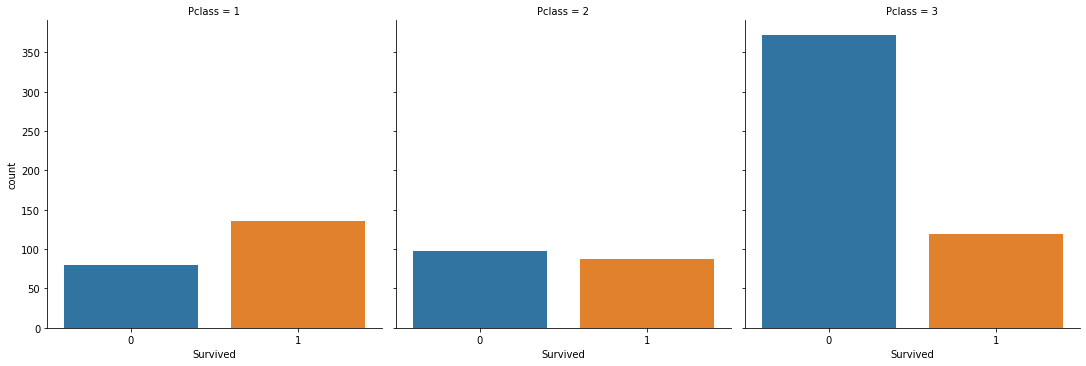

In [15]:
sns.catplot(x='Survived', col='Pclass', kind='count', data=train_data);

#### Conclusion
First class passengers had better chances of survival, followed by second class passenger, then third class passengers

### Survival based on embarked station

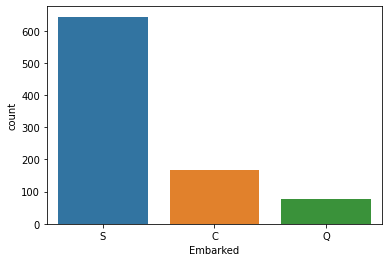

In [16]:
sns.countplot(x='Embarked', data=train_data);

In [17]:
Cherbourg = train_data.loc[train_data.Embarked == 'C']["Survived"]
rate_C = round(sum(Cherbourg)/len(Cherbourg)*100 , 2)

print("{}% of the passengers embarked from Cherbourg survived".format(rate_C))

55.36% of the passengers embarked from Cherbourg survived


In [18]:
Queenstown = train_data.loc[train_data.Embarked == 'Q']["Survived"]
rate_Q = round(sum(Queenstown)/len(Queenstown)*100 , 2)

print("{}% of the passengers embarked from Queenstown survived".format(rate_Q))

38.96% of the passengers embarked from Queenstown survived


In [19]:
Southampton = train_data.loc[train_data.Embarked == 'S']["Survived"]
rate_S = round(sum(Southampton)/len(Southampton)*100 , 2)

print("{}% of the passengers embarked from Southampton survived".format(rate_S))

33.7% of the passengers embarked from Southampton survived


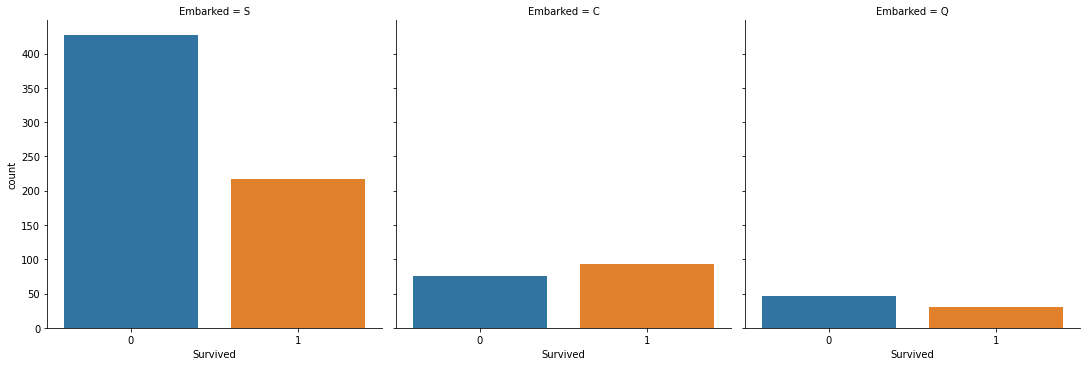

In [20]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=train_data);

#### Conclusion
Passengers embarked from Cherbourg had better survival rates, followed by Queenstown, then Southampton

### Survival based on age group
Consider 4 age groups:
* 0-18: Children
* 18-35: Young Adults
* 35-50: Middle Age
* 50-80: Elders

Before analyzing the age, we must drop the NaN values<br>
To tackle the NaN values, the data was imputed by the mean

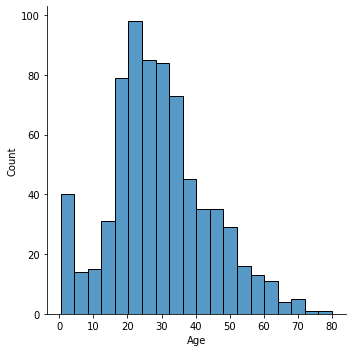

In [21]:
sns.displot(train_data.Age, kde=False);

From the figure above we can see that the passenger count: Young Adults > Middle Age > Children > Elders

In [22]:
mean = train_data['Age'].mean()
train_data['Age'].fillna(mean, inplace = True)
mean

29.69911764705882

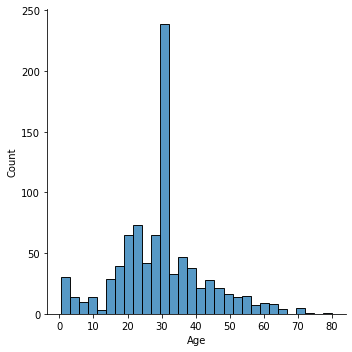

In [23]:
sns.displot(train_data.Age, kde=False);

As expected, the majority now has become the mean age which is around 30 years old.

In [24]:
child = train_data.loc[(train_data['Age'] > 0) & (train_data['Age'] < 18)]["Survived"]
rate_child = round(sum(child)/len(child)*100 , 2)

print("{}% of children survived".format(rate_child))

53.98% of children survived


In [25]:
adult = train_data.loc[(train_data['Age'] >= 18) & (train_data['Age'] < 35)]["Survived"]
rate_adult = round(sum(adult)/len(adult)*100 , 2)

print("{}% of young adults survived".format(rate_adult))

34.44% of young adults survived


In [26]:
mid = train_data.loc[(train_data['Age'] >= 35) & (train_data['Age'] < 50)]["Survived"]
rate_mid = round(sum(mid)/len(mid)*100 , 2)

print("{}% of middle aged people survived".format(rate_mid))

41.61% of middle aged people survived


In [27]:
old = train_data.loc[train_data['Age'] >=50]["Survived"]
rate_old = round(sum(old)/len(old)*100 , 2)

print("{}% of elders survived".format(rate_old))

36.49% of elders survived


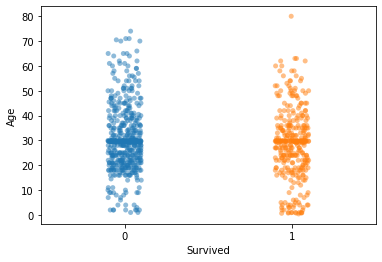

In [28]:
sns.stripplot(x='Survived', y='Age', data=train_data, alpha=0.5, jitter=True);

#### Conclusion
Children seem to have had the best luck in surviving, followed by middle agers. Elders, and young adults had the worse survival rates

### Final Thoughts
The best survival chances seems to be:
* woman
* aged 0-18
* first class
* embarked from Cherbourg

## Dealing with the test dataset

In [29]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [30]:
mean = test_data['Age'].mean()
test_data['Age'].fillna(mean, inplace = True)

In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Model Prediction

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [33]:
features = ["Age", "Sex", "Embarked", "Pclass"]

X_train = train_data.drop("Survived", axis=1)
X_train = pd.get_dummies(X_train[features])

Y_train = train_data["Survived"]

X_test  = test_data.drop("PassengerId", axis=1).copy()
X_test = pd.get_dummies(X_test[features])

X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

After optaining the X_train,Y_train, and X_test<br>
We can start looking at different models to make the predictions<br>
I'll be comparing two different algorithms, and I'll evaluate them based on the score of predictions made on the training set.
* K-nearest Neighbors
* Random Forest 

In [34]:
#K-nearest neighbors
k_neighbors = KNeighborsClassifier(n_neighbors = 3)
k_neighbors.fit(X_train, Y_train)
k_pred = k_neighbors.predict(X_test)
k_neighbors_score = round(knn.score(X_train, Y_train), 4)
k_neighbors_score

NameError: name 'knn' is not defined

The n was chosen by trail and error, where n = 3 had the highest score.

In [35]:
# Random Forest

rand_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rand_forest.fit(X_train, Y_train)
rand_pred = rand_forest.predict(X_test)
rand_forest.score(X_train, Y_train)
rand_forest_score = round(random_forest.score(X_train, Y_train), 4)
rand_forest_score

NameError: name 'random_forest' is not defined

After comparing the two scores, random forests has a higher score and thus will be chosen to get the final output

In [36]:

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': rand_pred})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
